In [0]:
    import cv2
    import numpy as np

In [8]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.17 MiB | 27.10 MiB/s, done.
Resolving deltas: 100% (3916/3916), done.


In [9]:
cd darknet

/content/darknet


In [0]:
    # Load Yolo
    net = cv2.dnn.readNet("yolov3.weights", "cfg/yolov3.cfg")
    classes = []
    with open("data/coco.names", "r") as f:
        classes = [line.strip() for line in f.readlines()]
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [13]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-01-27 16:57:53--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  38.8MB/s    in 6.5s    

2020-01-27 16:58:00 (36.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
    # Loading image
    img = cv2.imread("data/horses.jpg")
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

In [0]:
    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

In [0]:
    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

In [0]:
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

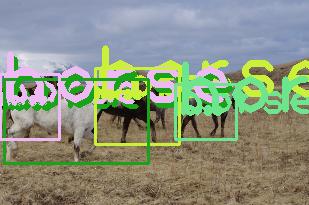

In [28]:
    from google.colab.patches import cv2_imshow
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[i]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 100), font, 0, color, 0)
    #cv2.imshow("Image", img)
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()